# SMOTE-Synthetic Minority Overfitting  Technique.
## It is a popular technique for handling imbalanced dataset


## Car Evaluation Problem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
careval=pd.read_csv('D:/ShakthiSai -Keerthana BABI and Learnings/AI and Machine Learning/Imbalanced Dataset/youtube_ai_ml-master/car_evaluation.csv')

In [3]:
careval.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
X=careval.iloc[:,:-1]
y=careval.outcome

In [5]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [6]:
careval.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   outcome   1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [7]:
careval.describe()

,doors,persons
count,1728.000000,1728.000000
mean,3.500000,3.666667
std,1.118358,1.247580
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,5.000000
max,5.000000,5.000000


In [8]:
careval.outcome.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

## we see that  data is imbalanced

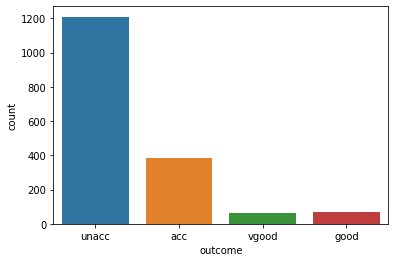

In [9]:
sns.countplot(x='outcome',data=careval)

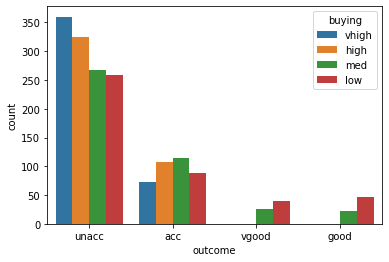

In [10]:
sns.countplot(x='outcome',hue='buying',data=careval)

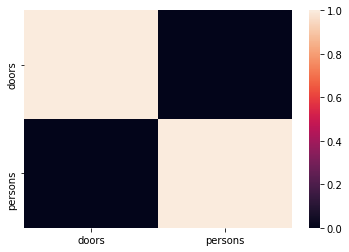

In [11]:
sns.heatmap(careval.corr())

### we need to convert other features to numeric

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
enc=LabelEncoder()

In [14]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [15]:
  
X.loc[:,['buying','maint','lug_boot','safety']]=X.loc[:,['buying','maint','lug_boot','safety']].apply(enc.fit_transform)


### Also this way

In [16]:
X.loc[:,['buying','maint','lug_boot','safety']] = \
X.loc[:,['buying','maint','lug_boot','safety']].apply(enc.fit_transform)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


X.head()

##  Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

## Training Model & Predict_ KNN Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier()

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
predictions=knn.predict(X_test)

## Evaluate Model - Actual(y_test) vs Predicted(predictions)

In [61]:
from sklearn import metrics

In [62]:
print(metrics.accuracy_score(y_test,predictions))

0.928709055876686


In [63]:
print(pd.crosstab(y_test,predictions))

col_0    acc  good  unacc  vgood
outcome                         
acc       89     2     11      0
good      10    10      1      0
unacc      5     0    366      0
vgood      5     2      1     17


### Here the diagonal elements are correctly classified. Others are misclassified
### in acc row, 89/102 is correctly classified =87%
### in good row, 10/21 = 47%
### in unacc row, 366/371= 98%
### in v good row, 17/25=65%


### Majority class got good accuracy and others are bad.. due to imbalanced dataset
### apply SMOTE

In [64]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
smote=SMOTE()

### Transform only the train data to smote

In [67]:
X_train_smote,y_train_smote=smote.fit_sample(X_train.astype('float'),y_train)

In [68]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'unacc': 839, 'acc': 282, 'good': 48, 'vgood': 40})
After SMOTE : Counter({'acc': 839, 'unacc': 839, 'vgood': 839, 'good': 839})


In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier()
knn.fit(X_train_smote,y_train_smote)
predictions1=knn.predict(X_test)
print(metrics.accuracy_score(y_test,predictions1))
pd.crosstab(y_test,predictions1)

0.9441233140655106


col_0,acc,good,unacc,vgood
outcome,,,,
acc,88,9,3,2
good,1,20,0,0
unacc,10,1,359,1
vgood,0,2,0,23


In [78]:
88/103

0.8543689320388349

In [79]:
20/21

0.9523809523809523

In [80]:
359/371

0.967654986522911

In [81]:
23/25

0.92

## We see that the accuracy is more compared to without smote

In [84]:
X_train_smote.shape


(3356, 6)

In [85]:
y_train_smote.shape

(3356,)

In [86]:
X_train_smote.head()

,buying,maint,doors,persons,lug_boot,safety
0,0.0,0.0,3.0,5.0,0.0,0.0
1,1.0,3.0,2.0,5.0,1.0,1.0
2,2.0,3.0,4.0,5.0,2.0,1.0
3,0.0,1.0,3.0,5.0,2.0,0.0
4,0.0,1.0,4.0,4.0,2.0,0.0


In [90]:
y_train_smote.head()

0      acc
1    unacc
2    unacc
3      acc
4      acc
Name: outcome, dtype: object

In [91]:
y_train_smote.value_counts()

good     839
acc      839
unacc    839
vgood    839
Name: outcome, dtype: int64

## We see that the values are equally distributed for the target variable